# Student Score Prediction

## 1️⃣ Introduction
This dataset contains information about students and various factors affecting their academic performance.
The goal is to predict students' **final exam scores** based on features like study hours, attendance, parental involvement, previous scores, sleep hours, and participation in activities.

**Objectives:**
- Understand the relationship between study hours and final exam scores.
- Explore the impact of other factors on student performance.
- Build regression models to predict final scores and compare their performance.

## import libraries

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np


---

## 2️⃣ Data Loading & Cleaning

### Load the dataset and quick overview.

In [2]:
df = pd.read_csv("data/raw/StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


### Check for missing values and handle them appropriately.

In [5]:
print(df.isna().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [6]:
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0],inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0],inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0],inplace=True)

C:\Users\Abdelrahman Matrix\AppData\Local\Temp\ipykernel_25272\2286151339.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0],inplace=True)
C:\Users\Abdelrahman Matrix\AppData\Local\Temp\ipykernel_25272\2286151339.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

### Remove duplicates if any.

In [7]:
df.drop_duplicates(inplace=True)

### Ensure correct data types for all columns.

In [8]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

---

## 3️⃣ Exploratory Data Analysis (EDA)

### **Univariate Analysis:** Visualize distributions of numerical features using histograms and boxplots.

In [9]:
numerical_cols = df.select_dtypes(include=['int64']).columns.to_list()

# Automatically calculate rows and columns
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(numerical_cols) / n_cols)

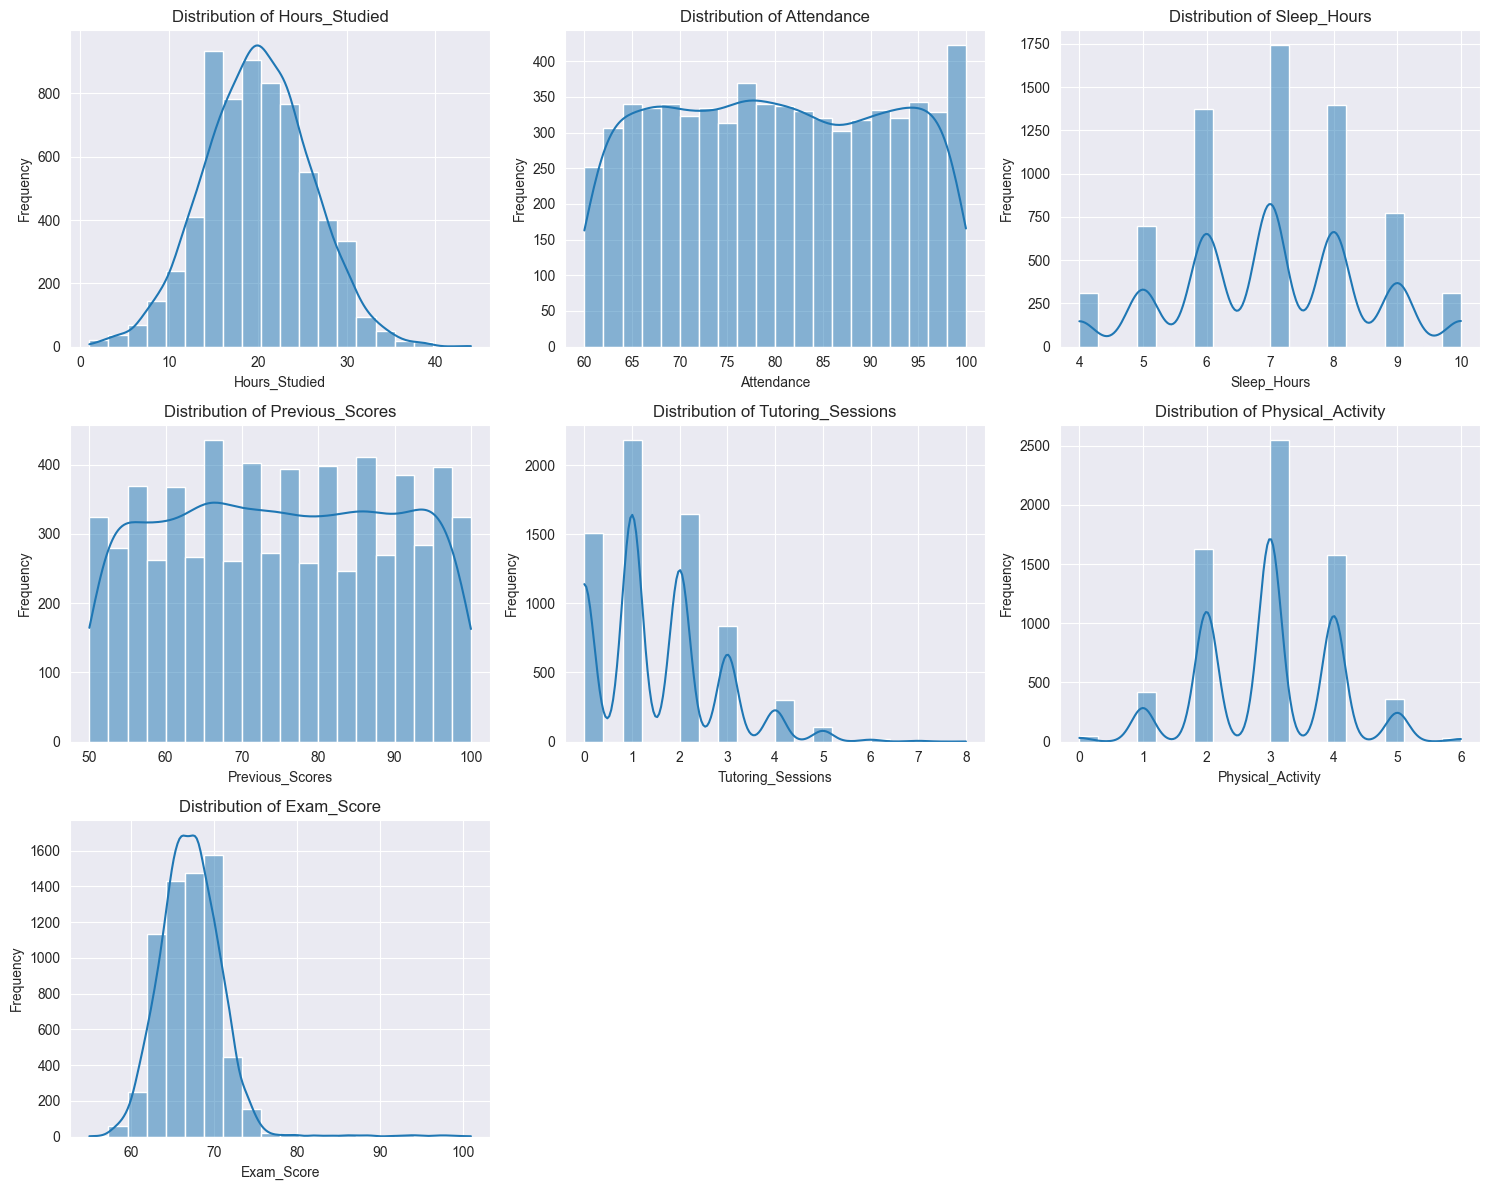

In [10]:

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots (if total plots < n_rows*n_cols)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

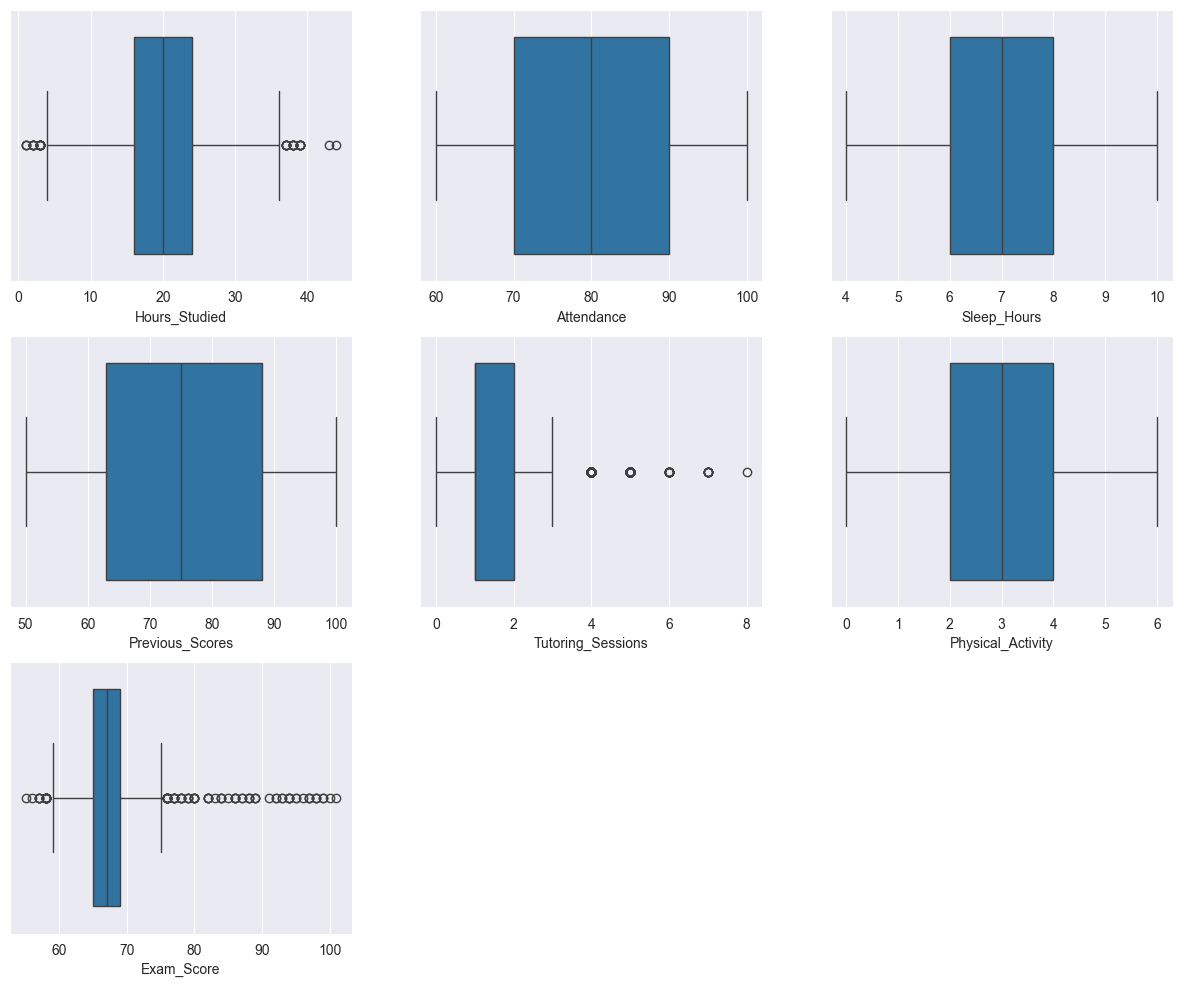

In [11]:
# Automatically calculate rows and columns
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])

# Remove any empty subplots (if total plots < n_rows*n_cols)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.show()

### **Bivariate Analysis:** Explore relationships between study hours and final scores using scatter plots.

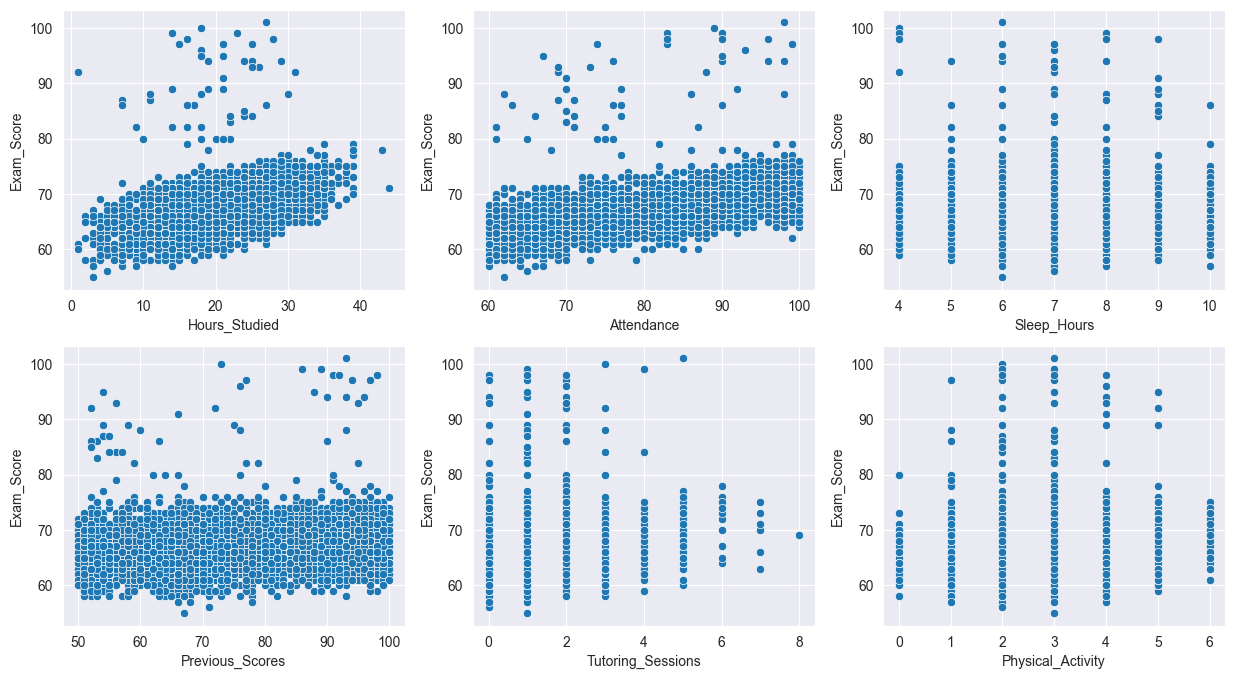

In [12]:
scatter_numerical_cols = numerical_cols.copy()
scatter_numerical_cols.remove('Exam_Score')

# Automatically calculate rows and columns
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(scatter_numerical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(scatter_numerical_cols):
    sns.scatterplot(x=df[col],y=df['Exam_Score'], ax=axes[i])

# Remove any empty subplots (if total plots < n_rows*n_cols)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.show()

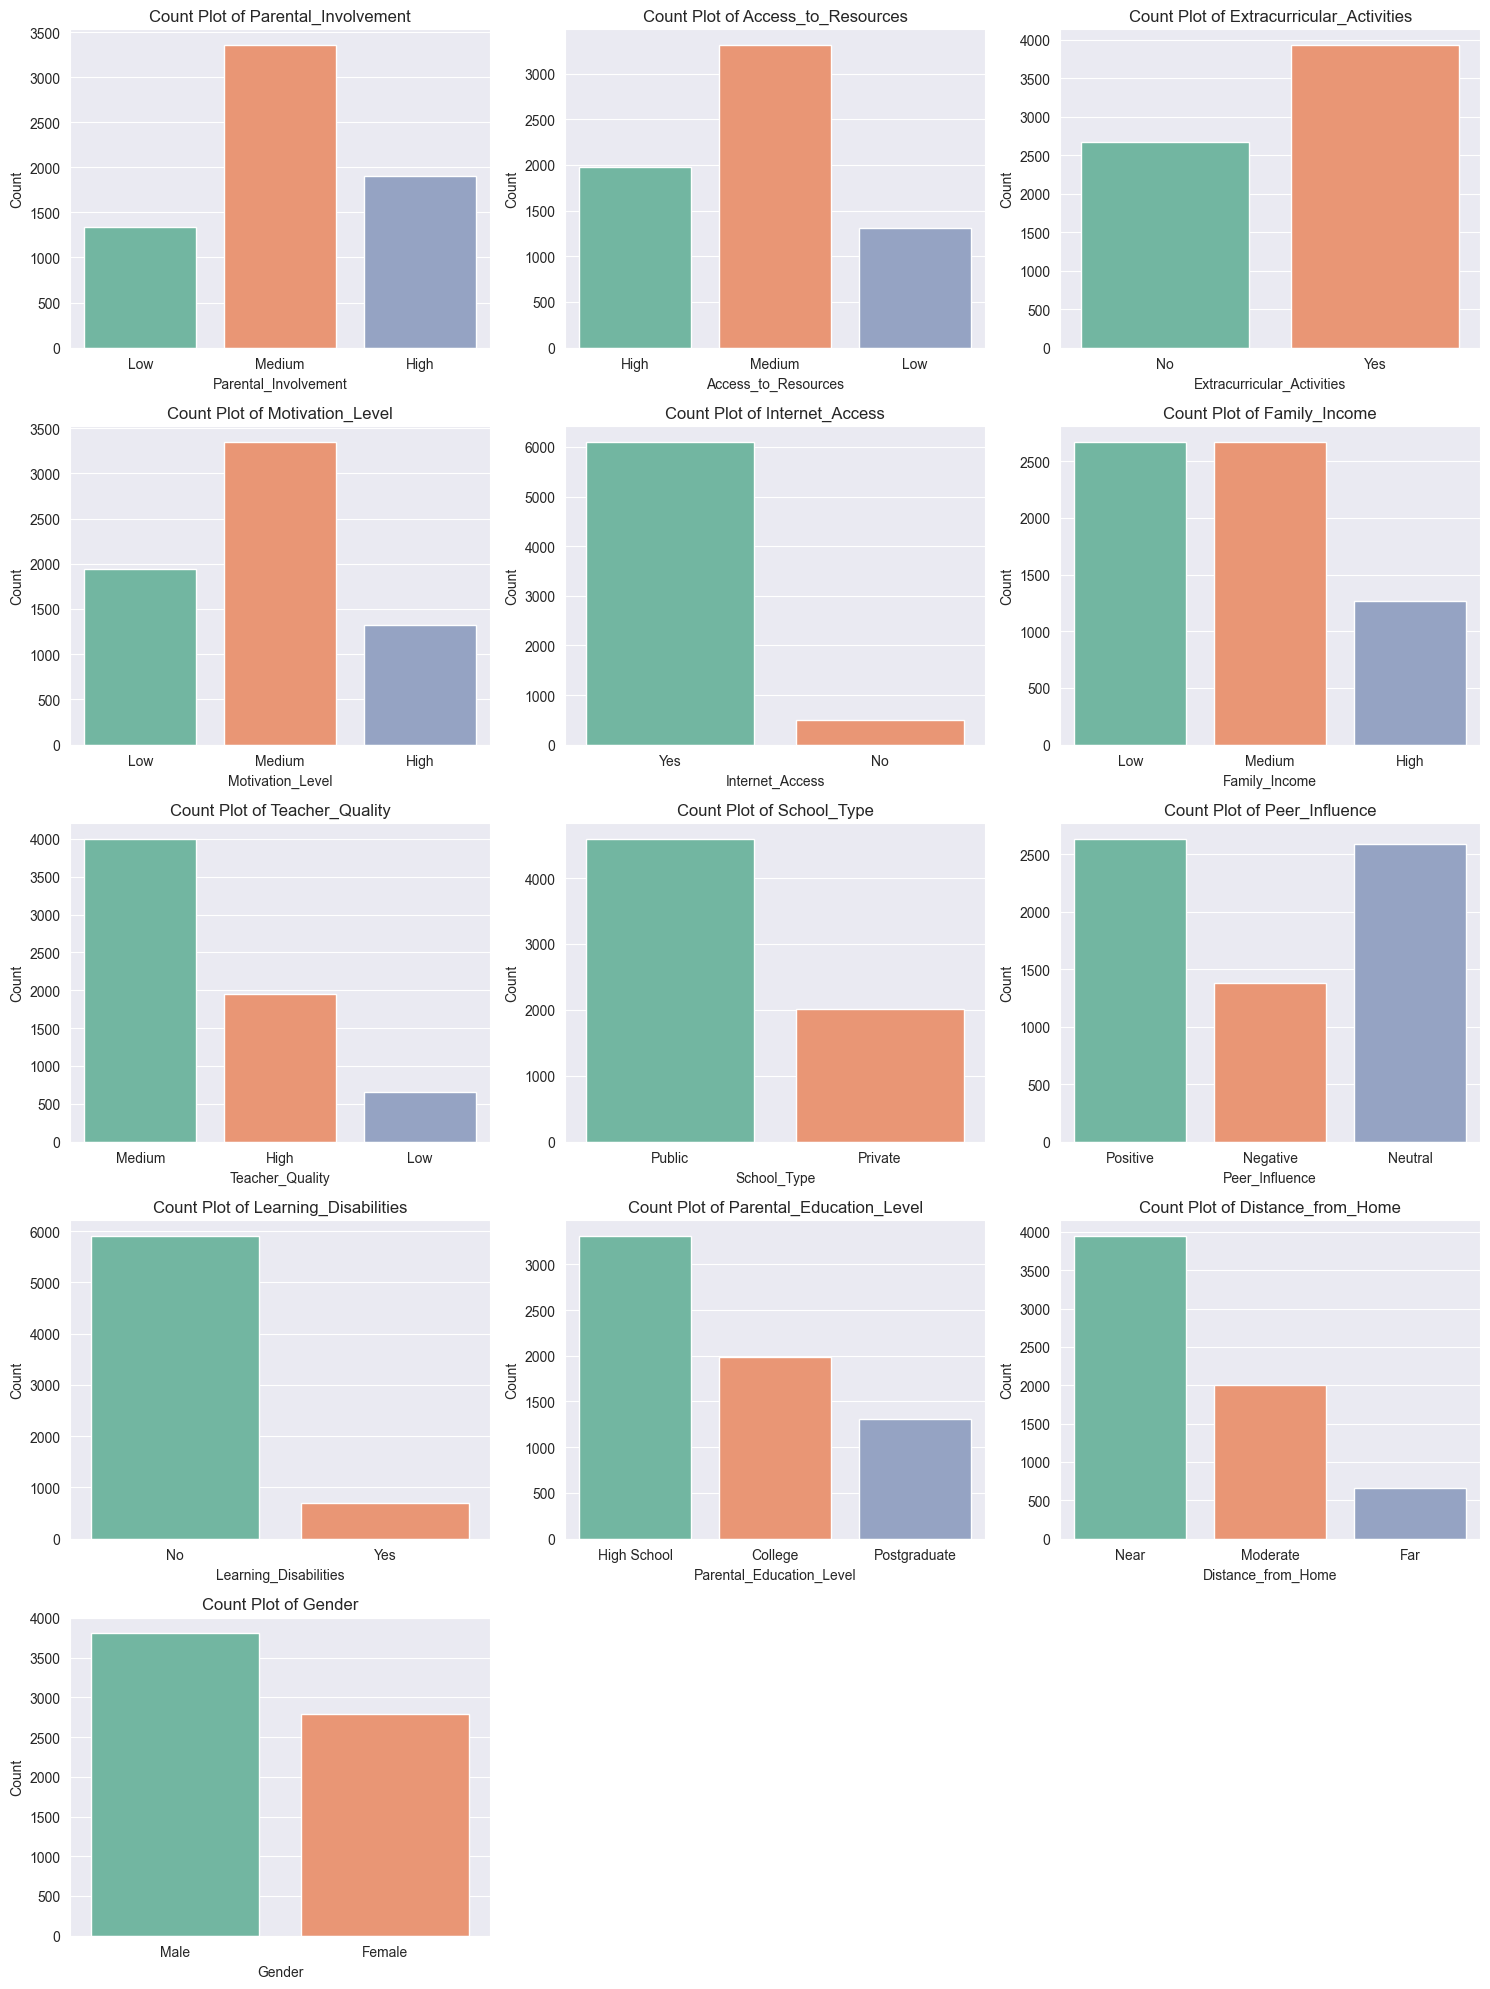

In [13]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()

# Automatically calculate rows and columns
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i], hue=col, palette="Set2")
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")   # countplot = frequency, not "Exam Score"
    axes[i].tick_params(axis="x")  # rotate labels if too long

# Remove any empty subplots (if total plots < n_rows*n_cols)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### **Correlation Analysis:** Use a heatmap to detect correlations between features and the target variable.

<Axes: >

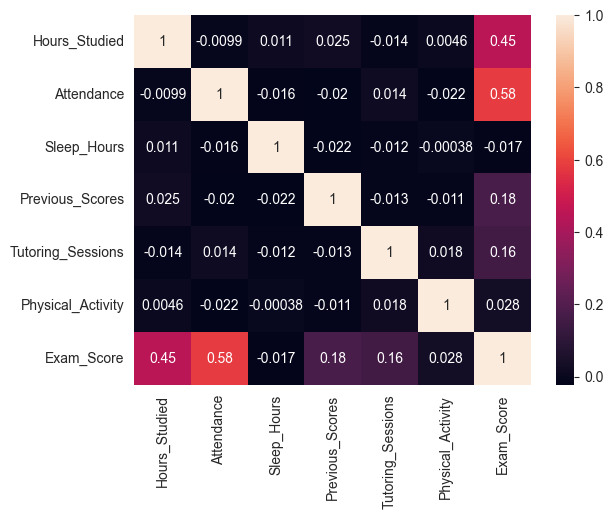

In [14]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix,annot=True)

---

## 4️⃣ Feature Engineering
- Scale numerical features like `Study_Hours` and `Previous_Scores` using `StandardScaler`.
- Encode categorical features using One-Hot Encoding or Label Encoding.
- Generate polynomial features if needed to capture non-linear relationships.

### Handling Categorical Features and Keeping the most relevant ones

In [15]:
from scipy.stats import f_oneway, ttest_ind

results = []
categorical_features = df.select_dtypes(include=["object", "category"]).columns.tolist()

for col in categorical_features:
    groups = df[col].unique()
    if len(groups) < 2:
        continue  # Skip features with only one category

    # Collect target values for each group
    group_values = [df[df[col] == g]['Exam_Score'] for g in groups]

    # Apply t-test if binary, ANOVA if more than 2 groups
    if len(groups) == 2:
        stat, p = ttest_ind(group_values[0], group_values[1], equal_var=False)
        test_used = "t-test (Welch)"
    else:
        stat, p = f_oneway(*group_values)
        test_used = "ANOVA"

    results.append({
        "feature": col,
        "test": test_used,
        "statistic": stat,
        "p_value": p,
        "state": "Has Effect" if p < 0.05 else "No Effect"
    })
    hypothesis_results = pd.DataFrame(results).sort_values('state',ascending=False)

In [16]:
df.drop(hypothesis_results[hypothesis_results['state'] == 'No Effect']['feature'],axis=1,inplace=True)

In [17]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only rows within the bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print(df.shape)

(6054, 18)


### Encoding categorical features

In [18]:
df_encoded = pd.get_dummies(df, drop_first=True)

# Features & target
X = df_encoded.drop(columns=["Exam_Score"])
y = df_encoded["Exam_Score"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Linear Regression Model

In [19]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


print("---- Linear Regression ----")
print("Train R²:", linear_model.score(X_train, y_train))
print()

---- Linear Regression ----
Train R²: 0.9898713303947839



### Polynomial Regression Model

In [20]:
poly_model = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_model.fit_transform(X_train)
X_poly_test = poly_model.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)


print("---- Polynomial Regression ----")
print("Train R²:", poly_reg.score(X_poly_train, y_train))
print()

---- Polynomial Regression ----
Train R²: 0.9905416529911635



### Cross-validation

In [21]:
scores_lin = cross_val_score(linear_model, X_train, y_train, cv=5, scoring="r2")
scores_poly = cross_val_score(
    Pipeline([("poly", PolynomialFeatures(degree=2, include_bias=False)),
              ("model", LinearRegression())]),
    X_train, y_train, cv=5, scoring="r2"
)

print("Linear CV R² mean:", np.mean(scores_lin), "±", np.std(scores_lin))
print("Polynomial CV R² mean:", np.mean(scores_poly), "±", np.std(scores_poly))

Linear CV R² mean: 0.9896926019624519 ± 0.00045390292604846394
Polynomial CV R² mean: 0.9890022738786461 ± 0.0005128671559077562


### Testing Accuracy

In [22]:
y_pred_lin = linear_model.predict(X_test)

print("---- Linear Regression ----")
print("Test R² :", linear_model.score(X_test, y_test))
print("RMSE    :", mean_squared_error(y_test, y_pred_lin))
print("MAE     :", mean_absolute_error(y_test, y_pred_lin))
print()

---- Linear Regression ----
Test R² : 0.9893345052235801
RMSE    : 0.10697190442103842
MAE     : 0.2747977041507467



In [23]:
y_pred_poly = poly_reg.predict(X_poly_test)

print("---- Polynomial Regression ----")
print("Test R² :", poly_reg.score(X_poly_test, y_test))
print("RMSE    :", mean_squared_error(y_test, y_pred_poly))
print("MAE     :", mean_absolute_error(y_test, y_pred_poly))
print()

---- Polynomial Regression ----
Test R² : 0.9883214718389627
RMSE    : 0.11713234354423863
MAE     : 0.28597032170266656



# Student Score Prediction

## 1️⃣ Introduction
This dataset contains information about students and various factors affecting their academic performance.
The goal is to predict students' **final exam scores** based on features like study hours, attendance, parental involvement, previous scores, sleep hours, and participation in activities.

**Objectives:**
- Understand the relationship between study hours and final exam scores.
- Explore the impact of other factors on student performance.
- Build regression models to predict final scores and compare their performance.

---

## 2️⃣ Data Loading & Cleaning
- Load the dataset and inspect the first few rows.
- Check for missing values and handle them appropriately.
- Remove duplicates if any.
- Ensure correct data types for all columns.

---

## 3️⃣ Exploratory Data Analysis (EDA)
- **Univariate Analysis:** Visualize distributions of numerical features using histograms and boxplots.
- **Bivariate Analysis:** Explore relationships between study hours and final scores using scatter plots.
- **Correlation Analysis:** Use a heatmap to detect correlations between features and the target variable.

---

## 4️⃣ Feature Engineering
- Scale numerical features like `Study_Hours` and `Previous_Scores` using `StandardScaler`.
- Encode categorical features using One-Hot Encoding or Label Encoding.
- Generate polynomial features if needed to capture non-linear relationships.

---

## 5️⃣ Model Building
- Split data into **training** and **testing** sets.
- Build **pipelines** for different regression models:
  - Linear Regression
  - Polynomial Regression
  - Ridge Regression
  - Random Forest Regressor
- Train models on the training set and prepare for evaluation.

---

## 6️⃣ Evaluation
- Evaluate model performance using metrics:
  - **R² (Coefficient of Determination)**
  - **RMSE (Root Mean Squared Error)**
  - **MAE (Mean Absolute Error)**
- Perform **cross-validation** to assess model stability.
- Compare metrics across models in a summary table.

---

## 7️⃣ Visualization
- Plot **predicted vs actual scores** to check model fit.
- Plot **residuals** to detect patterns or bias.
- Visualize **feature importance** for tree-based models like Random Forest.

---

## 8️⃣ Conclusion
- Summarize which model performed best and why.
- Discuss key insights about the impact of study hours and other features on exam scores.
- Suggest future improvements, such as collecting more data or experimenting with feature selection and regularization.

